In [2]:
import numpy as np
import torch
import os 
import matplotlib.pyplot as plt

## Make the plots 

### For robot navigation example

In [59]:
# Load the file
current_dir = os.getcwd()
filename = current_dir + "/robot_nav/stats_robot_nav_sl.pt"
sl_results = torch.load(filename)
filename = current_dir + "/robot_nav/stats_robot_nav_ssl.pt"
ssl_results = torch.load(filename)
filename = current_dir + "/robot_nav/stats_robot_nav_hybrid_1.pt"
hl_results = torch.load(filename)
print(sl_results.keys())


dict_keys(['obj_val', 'opt_obj_val', 'slack_penalty', 'y_penalty', 'constraint_violation_magnitude', 'constraint_violation_count', 'constraint_violation_percentage', 'supervised_loss', 'bit_accuracy', 'optimality_gap'])


/tmp/ipykernel_1176437/1892626234.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(all_data[i], labels=labels, patch_artist=True)
/tmp/ipykernel_1176437/1892626234.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(all_data[i], labels=labels, patch_artist=True)
/tmp/ipykernel_1176437/1892626234.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(all_data[i], labels=labels, patch_artist=True)


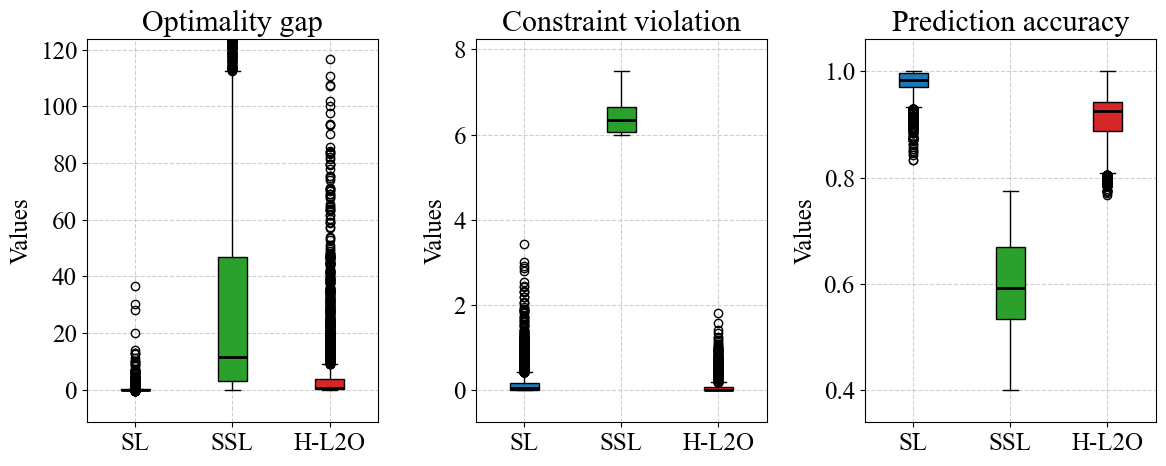

In [63]:
# Configure global font settings
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 18
plt.rcParams["pdf.fonttype"] = 42
plt.rcParams["ps.fonttype"] = 42

slack_penalty = [sl_results["constraint_violation_magnitude"], ssl_results["constraint_violation_magnitude"], 
                hl_results["constraint_violation_magnitude"]]
bit_accuracy = [sl_results["bit_accuracy"], ssl_results["bit_accuracy"], hl_results["bit_accuracy"]]
optimality_gap = [sl_results["optimality_gap"]/100, ssl_results["optimality_gap"]/100,  hl_results["optimality_gap"]/100]
all_data = [optimality_gap, slack_penalty, bit_accuracy]
labels=["SL", "SSL", "H-L2O"]
titles = [ "Optimality gap", "Constraint violation", "Prediction accuracy"]
colors = ["#1f77b4", "#2ca02c", "#d62728"]  # blue, green, red

fig, axes = plt.subplots(1, 3, figsize=(12, 5))  # <-- removed sharey=True

for i, ax in enumerate(axes):
    bp = ax.boxplot(all_data[i], labels=labels, patch_artist=True)
    for patch, color in zip(bp["boxes"], colors):
        patch.set_facecolor(color)
    for median in bp["medians"]:
        median.set_color("black")
        median.set_linewidth(2)

    ax.set_title(titles[i])
    ax.set_ylabel("Values")
    ax.grid(True, linestyle="--", alpha=0.6)
    whisker_values = [line.get_ydata() for line in bp["whiskers"]]
    y_vals = np.concatenate(whisker_values)
    y_min, y_max = np.min(y_vals), np.max(y_vals)
    # Add padding
    margin = 0.1 * (y_max - y_min)
    ax.set_ylim(y_min - margin, y_max + margin)


# fig.suptitle("Statstical comparsion for robot navigation example", fontsize=20)
plt.tight_layout()
plt.savefig("robot_nav_comparison.pdf", format="pdf", bbox_inches="tight")
plt.show()


### For thermal tank example

In [65]:
# Load the file
current_dir = os.getcwd()
filename = current_dir + "/energy/stats_energy_tank_sl.pt"
sl_results = torch.load(filename)
filename = current_dir + "/energy/stats_energy_tank_ssl.pt"
ssl_results = torch.load(filename)
filename = current_dir + "/energy/stats_energy_tank_hybrid_1.pt"
hl_results = torch.load(filename)
print(sl_results.keys())


dict_keys(['obj_val', 'opt_obj_val', 'optimality_gap', 'slack_penalty', 'supervised_loss', 'bit_accuracy'])


/tmp/ipykernel_1176437/260962486.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(all_data[i], labels=labels, patch_artist=True)
/tmp/ipykernel_1176437/260962486.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(all_data[i], labels=labels, patch_artist=True)
/tmp/ipykernel_1176437/260962486.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(all_data[i], labels=labels, patch_artist=True)


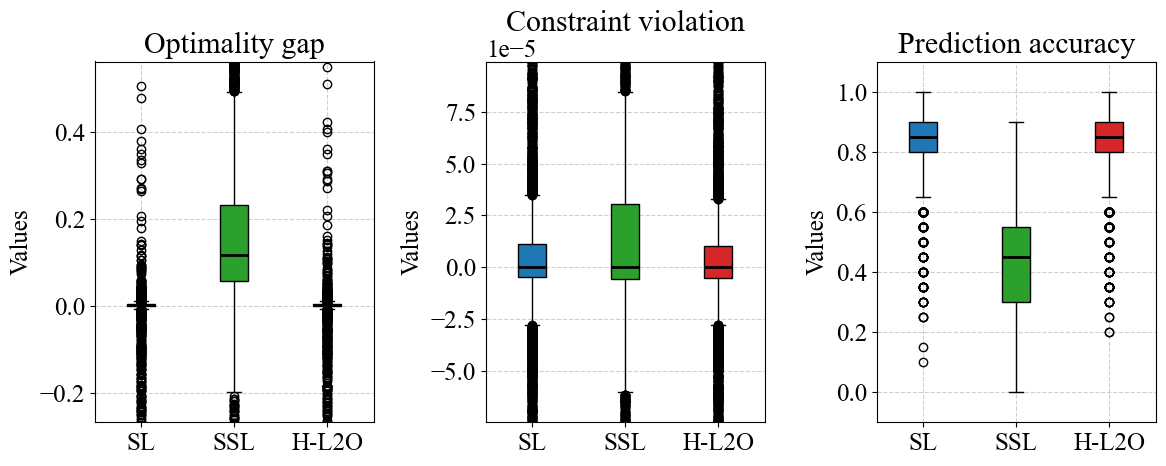

In [66]:
# Configure global font settings
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 18
plt.rcParams["pdf.fonttype"] = 42
plt.rcParams["ps.fonttype"] = 42

slack_penalty = [sl_results["slack_penalty"], ssl_results["slack_penalty"], hl_results["slack_penalty"]]
bit_accuracy = [sl_results["bit_accuracy"], ssl_results["bit_accuracy"], hl_results["bit_accuracy"]]
optimality_gap = [sl_results["optimality_gap"]/100, ssl_results["optimality_gap"]/100,  hl_results["optimality_gap"]/100]
all_data = [optimality_gap, slack_penalty, bit_accuracy]
labels=["SL", "SSL", "H-L2O"]
titles = [ "Optimality gap", "Constraint violation", "Prediction accuracy"]
colors = ["#1f77b4", "#2ca02c", "#d62728"]  # blue, green, red

fig, axes = plt.subplots(1, 3, figsize=(12, 5))  # <-- removed sharey=True

for i, ax in enumerate(axes):
    bp = ax.boxplot(all_data[i], labels=labels, patch_artist=True)
    for patch, color in zip(bp["boxes"], colors):
        patch.set_facecolor(color)
    for median in bp["medians"]:
        median.set_color("black")
        median.set_linewidth(2)

    ax.set_title(titles[i])
    ax.set_ylabel("Values")
    ax.grid(True, linestyle="--", alpha=0.6)
    whisker_values = [line.get_ydata() for line in bp["whiskers"]]
    y_vals = np.concatenate(whisker_values)
    y_min, y_max = np.min(y_vals), np.max(y_vals)
    # Add padding
    margin = 0.1 * (y_max - y_min)
    ax.set_ylim(y_min - margin, y_max + margin)


# fig.suptitle("Statstical comparsion for thermal energy tank example", fontsize=20)
plt.tight_layout()
plt.savefig("thermal_tank_comparison.pdf", format="pdf", bbox_inches="tight")
plt.show()
